<span style="font-size:27px; color:blue">**Twitter Sentiment Analysis**</span>

## Import Necessary Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
 
pd.set_option('display.max_columns', None)

import re
import string
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Exploratory Data Analysis

### Read Dataset

In [3]:
# Load the dataset
file_path = r"C:\Users\Zuu Zuu Kyaw Shwe\Desktop\Data Mining and Machine Learning\Project\Twitter Sentiment Analysis\twitter_training.csv"
df = pd.read_csv(file_path)

In [4]:
# Show the dataframe dimension
df.shape

(74681, 4)

In [7]:
# Show the first few rows of the dataframe
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [9]:
# Add column names
df.columns = ['Tweet_ID', 'Entity', 'Sentiment', 'Tweet']
df.head()

,Tweet_ID,Entity,Sentiment,Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [11]:
# Display dataset's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet_ID   74681 non-null  int64 
 1   Entity     74681 non-null  object
 2   Sentiment  74681 non-null  object
 3   Tweet      73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


### Data Cleaning

In [13]:
# Check for missing values in the dataset
df.isnull().sum()

Tweet_ID       0
Entity         0
Sentiment      0
Tweet        686
dtype: int64

In [15]:
# Removing rows where 'Tweet' is missing
df = df.dropna(subset=['Tweet'])
df.isnull().sum()

Tweet_ID     0
Entity       0
Sentiment    0
Tweet        0
dtype: int64

In [17]:
# Check for duplicates in the dataset
df.duplicated().sum()

2340

In [19]:
# Removing duplicate rows from the dataset
df = df.drop_duplicates()
df.duplicated().sum()

0

### Data Visualization

In [21]:
# Check unique values in Entity
print(f'The number of unique entities : {len(df.Entity.unique())}')
df.Entity.unique()

The number of unique entities : 32


array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [23]:
# Count the occurrences of each entity
Entities = df.Entity.value_counts()
Entities_df = Entities.reset_index()
Entities_df.columns = ['Entity', 'Count']
print(Entities_df.to_string(index=False))

                           Entity  Count
             TomClancysRainbowSix   2328
                          Verizon   2319
                        MaddenNFL   2315
                       CallOfDuty   2314
                        Microsoft   2304
                     WorldOfCraft   2300
                            NBA2K   2299
                  LeagueOfLegends   2296
             TomClancysGhostRecon   2291
                         Facebook   2289
                      ApexLegends   2278
                  johnson&johnson   2257
                      Battlefield   2255
                           Amazon   2249
        CallOfDutyBlackopsColdWar   2242
                             FIFA   2238
                            Dota2   2225
                        Overwatch   2220
                      Hearthstone   2219
                        HomeDepot   2216
              GrandTheftAuto(GTA)   2208
                      Borderlands   2205
                    Xbox(Xseries)   2201
                

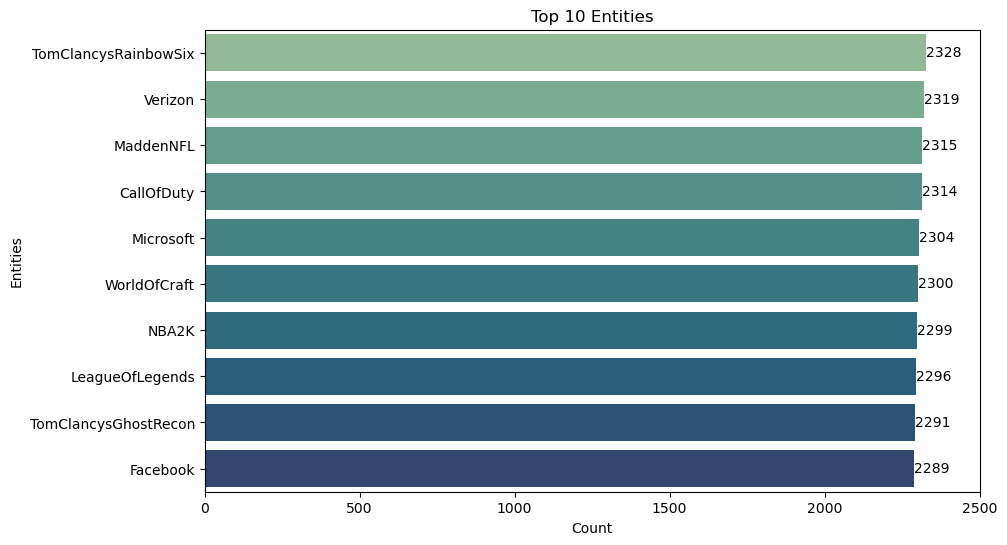

In [25]:
# Plot the top 10 entities
plt.figure(figsize=(10,6))
bar = sns.barplot(x=Entities.values[:10], y=Entities.index[:10], palette='crest')

for container in bar.containers:
    bar.bar_label(container)
plt.title('Top 10 Entities')
plt.xlabel('Count')
plt.ylabel('Entities')
plt.xlim(0, 2500)
plt.show()

In [27]:
# Check unique values in sentiment column
df.Sentiment.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

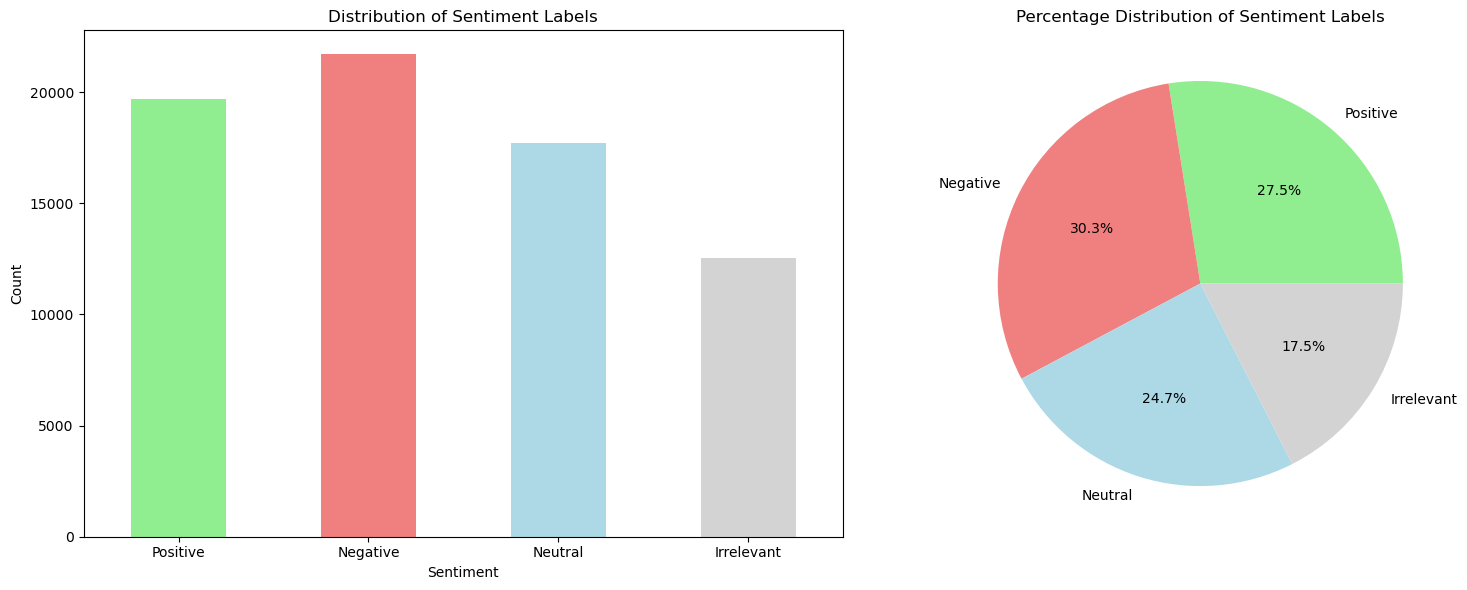

In [29]:
# Define custom colors
sentiment_colors = {
    'Positive': 'lightgreen',
    'Negative': 'lightcoral',
    'Neutral': 'lightblue',
    'Irrelevant': 'lightgrey'
}

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting the bar chart for sentiment distribution
df['Sentiment'].value_counts().reindex(sentiment_colors.keys()).plot(
    kind='bar', color=[sentiment_colors[sentiment] for sentiment in sentiment_colors.keys()], ax=axes[0])
axes[0].set_title('Distribution of Sentiment Labels')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Count')
axes[0].set_xticks(range(len(df['Sentiment'].unique())))
axes[0].set_xticklabels(sentiment_colors.keys(), rotation=0)

# Plotting the pie chart for sentiment distribution
df['Sentiment'].value_counts().reindex(sentiment_colors.keys()).plot(
    kind='pie', autopct='%1.1f%%', colors=[sentiment_colors[sentiment] for sentiment in sentiment_colors.keys()], ax=axes[1])
axes[1].set_ylabel('')
axes[1].set_title('Percentage Distribution of Sentiment Labels')

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

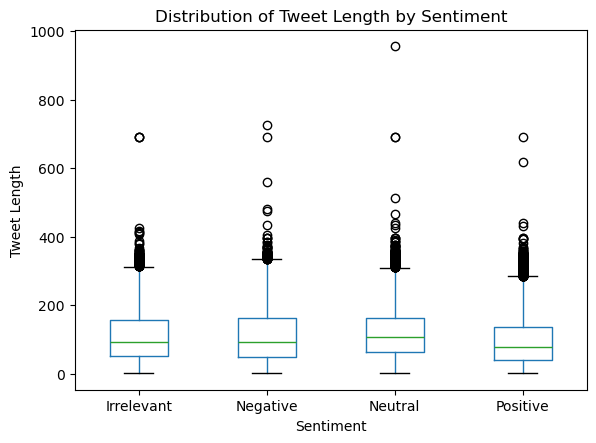

In [31]:
# Calculating the length of each tweet in the 'Tweet' column
df['Tweet_length'] = df['Tweet'].apply(len)

# Creating a boxplot to visualize the distribution of text length for each sentiment
plt.figure(figsize=(10, 6))
df.boxplot(column='Tweet_length', by='Sentiment', grid=False)
plt.title('Distribution of Tweet Length by Sentiment')
plt.suptitle('')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length')
plt.show()

In [33]:
# Crosstab visualization for sentiment by entity
crosstab_df = pd.crosstab(df.Entity, df.Sentiment).reindex(columns=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
crosstab_df.style.background_gradient(subset=['Positive'], cmap='Greens')\
    .background_gradient(subset=['Negative'], cmap='Reds')\
    .background_gradient(subset=['Neutral'], cmap='Blues')\
    .background_gradient(subset=['Irrelevant'], cmap='Greys')

Sentiment,Positive,Negative,Neutral,Irrelevant
Entity,,,,
Amazon,302,565,1197,185
ApexLegends,606,574,913,185
AssassinsCreed,1382,365,153,256
Battlefield,561,445,342,907
Borderlands,971,415,581,238
CS-GO,717,335,523,620
CallOfDuty,426,861,367,660
CallOfDutyBlackopsColdWar,817,540,340,545
Cyberpunk2077,902,360,456,457


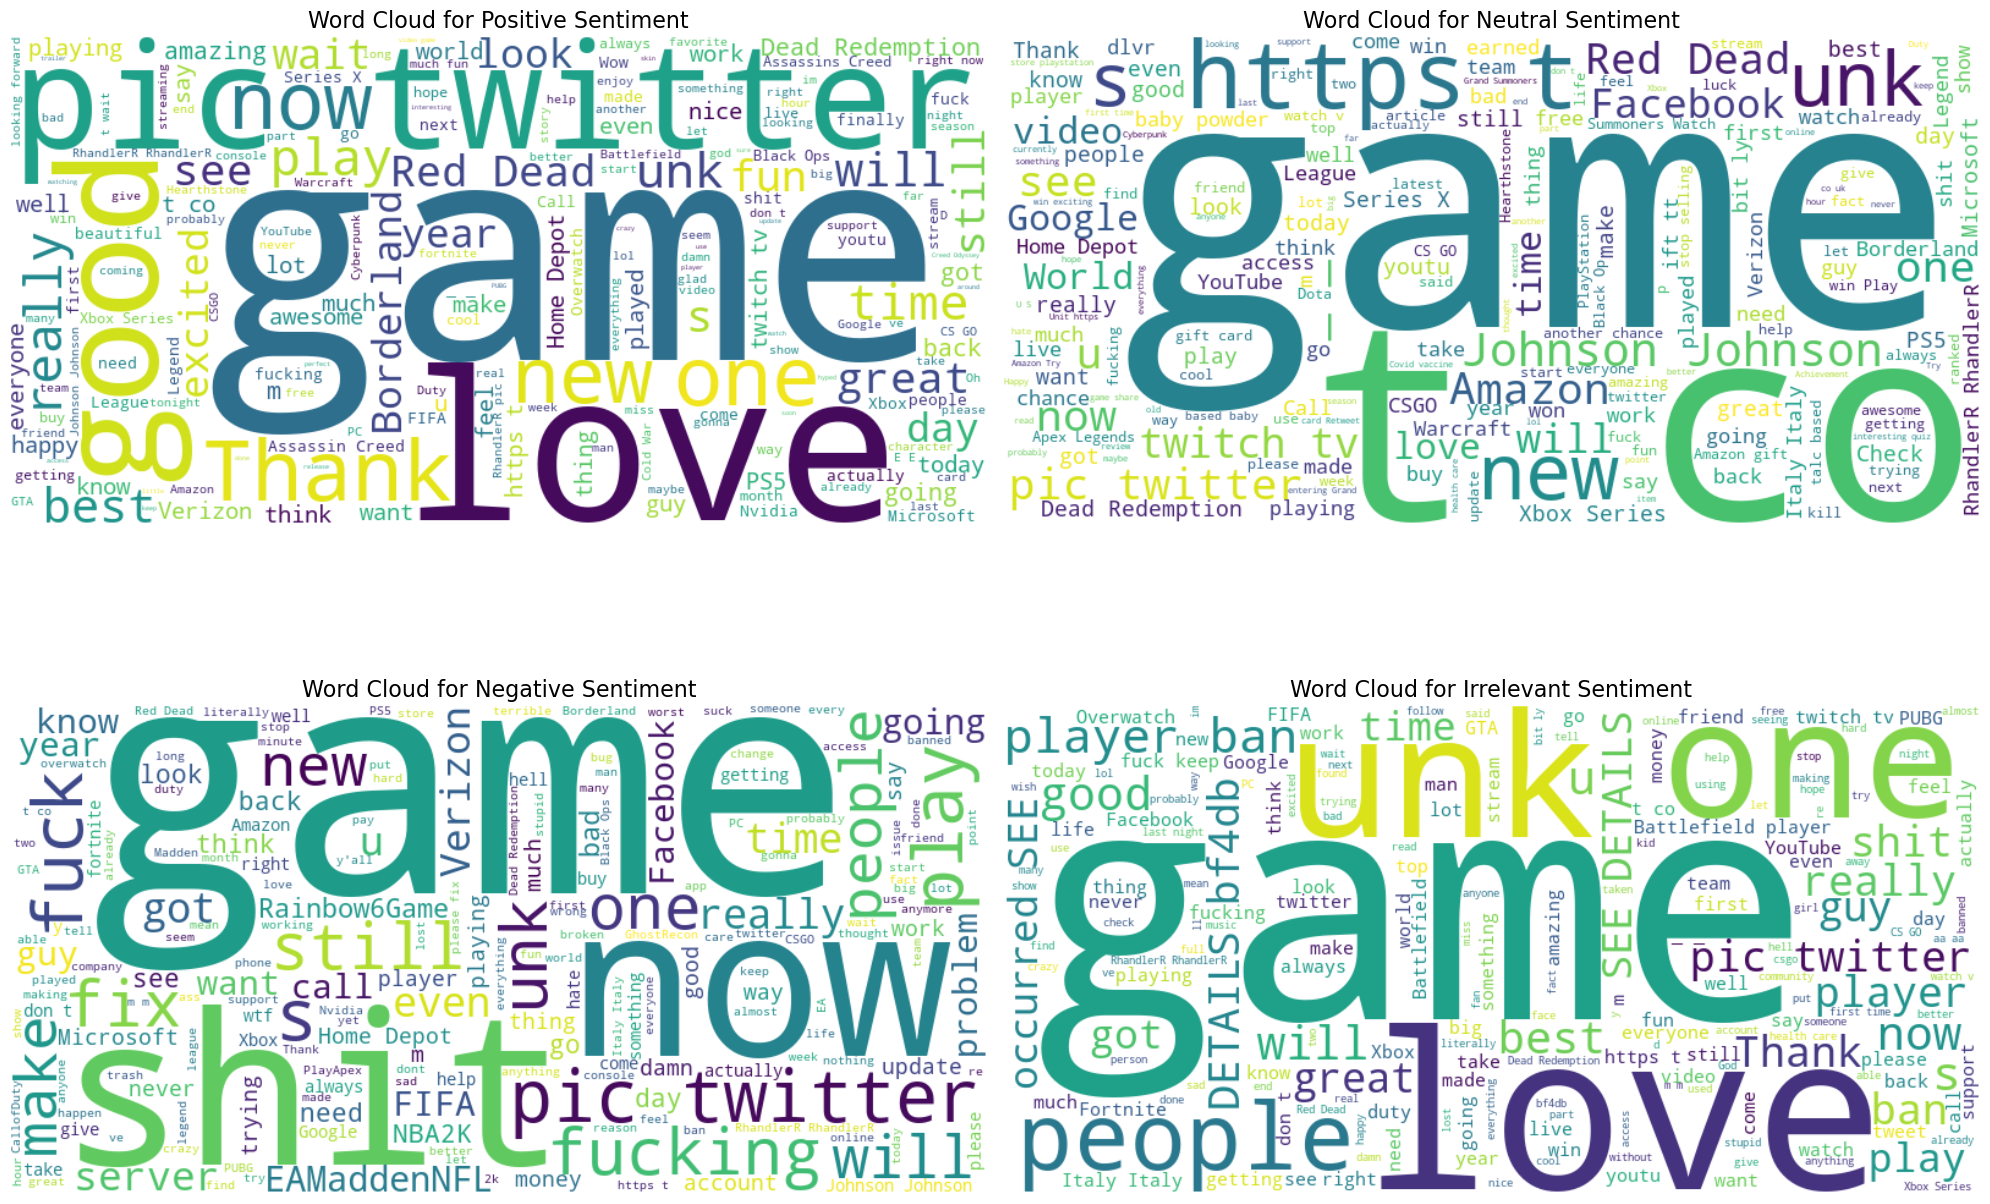

In [35]:
# Function to generate word cloud for a given sentiment
def plot_wordcloud(sentiment, df, ax):
    # Filter tweets by the given sentiment
    text = " ".join(df[df['Sentiment'] == sentiment]['Tweet'].astype(str).tolist())
    
    # Create and configure the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Word Cloud for {sentiment} Sentiment', fontsize=16)
    ax.axis('off')

fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Plot word clouds for each sentiment type
sentiments = df['Sentiment'].unique()
for i, sentiment in enumerate(sentiments):
    plot_wordcloud(sentiment, df, axes[i//2, i%2])

plt.tight_layout()
plt.show()

### Text Processing

In [37]:
# Remove non-string
def filter_non_string(df, column):
    df = df.dropna(subset=[column])
    df[column] = df[column].astype(str)
    return df

In [39]:
# Convert to lowercase
def normalize_text(text):
    return text.lower()

In [41]:
# Remove numeric digits
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

In [43]:
# Remove HTML tags
def remove_html_tags(text):
    return re.sub(r'<.*?>', '', text)

In [45]:
# Remove URLs
def remove_urls(text):
    return re.sub(r'http\S+|www\S+', '', text)

In [47]:
# Remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [49]:
# Remove stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

In [51]:
# Remove emojis
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [53]:
# Split text in token
def tokenize_text(text):
    return word_tokenize(text)

In [55]:
# Apply lemmatization
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

In [57]:
def preprocess_text(df):
    
    df = filter_non_string(df, 'Tweet')
    df['Tweet'] = df['Tweet'].apply(normalize_text)
    df['Tweet'] = df['Tweet'].apply(remove_html_tags)
    df['Tweet'] = df['Tweet'].apply(remove_urls)
    df['Tweet'] = df['Tweet'].apply(remove_numbers)
    df['Tweet'] = df['Tweet'].apply(remove_punctuation)
    df['Tweet'] = df['Tweet'].apply(remove_emojis)
    df['Tweet'] = df['Tweet'].apply(tokenize_text)
    df['Tweet'] = df['Tweet'].apply(lemmatize_tokens)
    df['Tweet'] = df['Tweet'].apply(remove_stopwords)
    return df

In [59]:
# Apply text processing
df_processed = preprocess_text(df)

In [61]:
# Convert list of words into a single string for each entry in 'Tweet' column
df_processed['Tweet'] = df_processed['Tweet'].apply(lambda x: ' '.join(x))

## Models Building

In [63]:
# Split data into features (X) and target (y)
X = df_processed['Tweet'] 
y = df_processed['Sentiment'] 

In [65]:
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

### Logistic Regression

In [69]:
logistic_regression = LogisticRegression(solver='liblinear', random_state=42)
logistic_regression.fit(X_train_tfidf, y_train)

print("Logistic Regression training score:", logistic_regression.score(X_train_tfidf, y_train))
print("Logistic Regression testing score:", logistic_regression.score(X_test_tfidf, y_test))
logistic_test_score = round(logistic_regression.score(X_test_tfidf, y_test) * 100, 2)

# Make predictions on the test set
target_pred_lr = logistic_regression.predict(X_test_tfidf)

Logistic Regression training score: 0.8201276952061963
Logistic Regression testing score: 0.7504710069081013


### Naive Bayes

In [71]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tfidf, y_train)

print("Naive Bayes training score:", naive_bayes.score(X_train_tfidf, y_train))
print("Naive Bayes testing score:", naive_bayes.score(X_test_tfidf, y_test))
naive_bayes_test_score = round(naive_bayes.score(X_test_tfidf, y_test) * 100, 2)

# Make predictions on the test set
target_pred_nb = naive_bayes.predict(X_test_tfidf)

Naive Bayes training score: 0.7689623892261531
Naive Bayes testing score: 0.7109762054287907


### SGD Classifier

In [73]:
sgd_classifier = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_classifier.fit(X_train_tfidf, y_train)

print("SGD Classifier training score:", sgd_classifier.score(X_train_tfidf, y_train))
print("SGD Classifier testing score:", sgd_classifier.score(X_test_tfidf, y_test))
sgd_classifier_test_score = round(sgd_classifier.score(X_test_tfidf, y_test) * 100, 2)

# Make predictions on the test set
target_pred_sgd = sgd_classifier.predict(X_test_tfidf)

SGD Classifier training score: 0.772172214081362
SGD Classifier testing score: 0.7106273114227898


### Random Forest Classifier

In [75]:
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest.fit(X_train_tfidf, y_train)

print("Random Forest training score:", random_forest.score(X_train_tfidf, y_train))
print("Random Forest testing score:", random_forest.score(X_test_tfidf, y_test))
random_forest_test_score = round(random_forest.score(X_test_tfidf, y_test) * 100, 2)

# Make predictions on the test set
target_pred_rf = random_forest.predict(X_test_tfidf)

Random Forest training score: 0.9742516223571279
Random Forest testing score: 0.9031470239341288


### Extra Trees Classifier

In [77]:
extra_trees = ExtraTreesClassifier(random_state=42, n_estimators=100)
extra_trees.fit(X_train_tfidf, y_train)

print("Extra Trees Classifier training score:", extra_trees.score(X_train_tfidf, y_train))
print("Extra Trees Classifier testing score:", extra_trees.score(X_test_tfidf, y_test))
extra_trees_test_score = round(extra_trees.score(X_test_tfidf, y_test) * 100, 2)

# Make predictions on the test set
target_pred_et = extra_trees.predict(X_test_tfidf)

Extra Trees Classifier training score: 0.9742516223571279
Extra Trees Classifier testing score: 0.922824645872584


## Models Evaluation

### Comparison of Models' Training and Testing Scores


Comparison of Models' Training and Testing Scores:
                  Model  Training Score  Testing Score
4  ExtraTreesClassifier        0.974252       0.922825
3          RandomForest        0.974252       0.903147
0    LogisticRegression        0.820128       0.750471
1            NaiveBayes        0.768962       0.710976
2         SGDClassifier        0.772172       0.710627


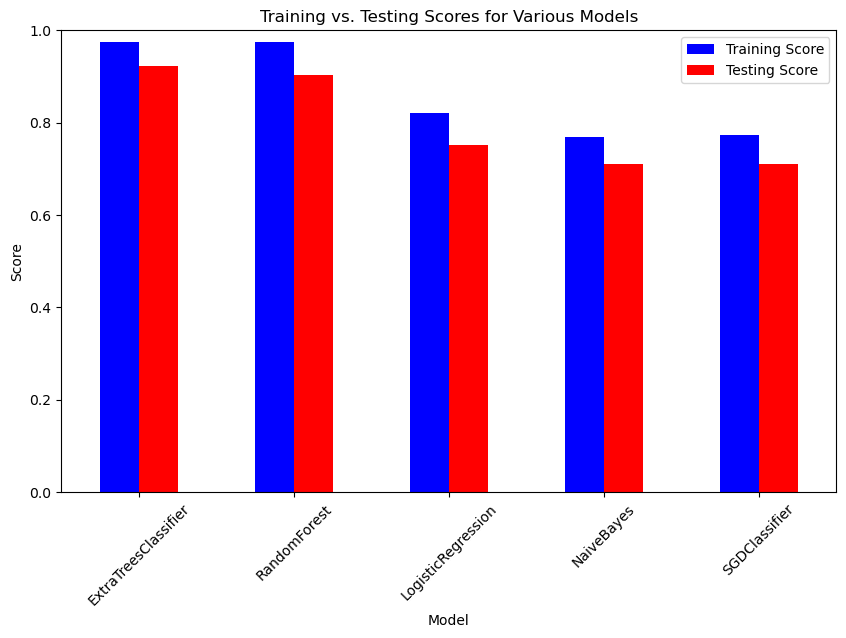

In [79]:
results = {
    'Model': [
        'LogisticRegression', 
        'NaiveBayes', 
        'SGDClassifier', 
        'RandomForest', 
        'ExtraTreesClassifier'
    ],
    'Training Score': [
        logistic_regression.score(X_train_tfidf, y_train),
        naive_bayes.score(X_train_tfidf, y_train),
        sgd_classifier.score(X_train_tfidf, y_train),
        random_forest.score(X_train_tfidf, y_train),
        extra_trees.score(X_train_tfidf, y_train)
    ],
    'Testing Score': [
        logistic_regression.score(X_test_tfidf, y_test),
        naive_bayes.score(X_test_tfidf, y_test),
        sgd_classifier.score(X_test_tfidf, y_test),
        random_forest.score(X_test_tfidf, y_test),
        extra_trees.score(X_test_tfidf, y_test)
    ]
}
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Testing Score', ascending=False)
print("\nComparison of Models' Training and Testing Scores:")
print(results_df)

results_df.set_index('Model', inplace=True)
results_df.plot(kind='bar', figsize=(10, 6), ylim=(0, 1), colormap='bwr', rot=45)
plt.title('Training vs. Testing Scores for Various Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(['Training Score', 'Testing Score'])
plt.show()

### Comparison of Models' Confusion Matrix

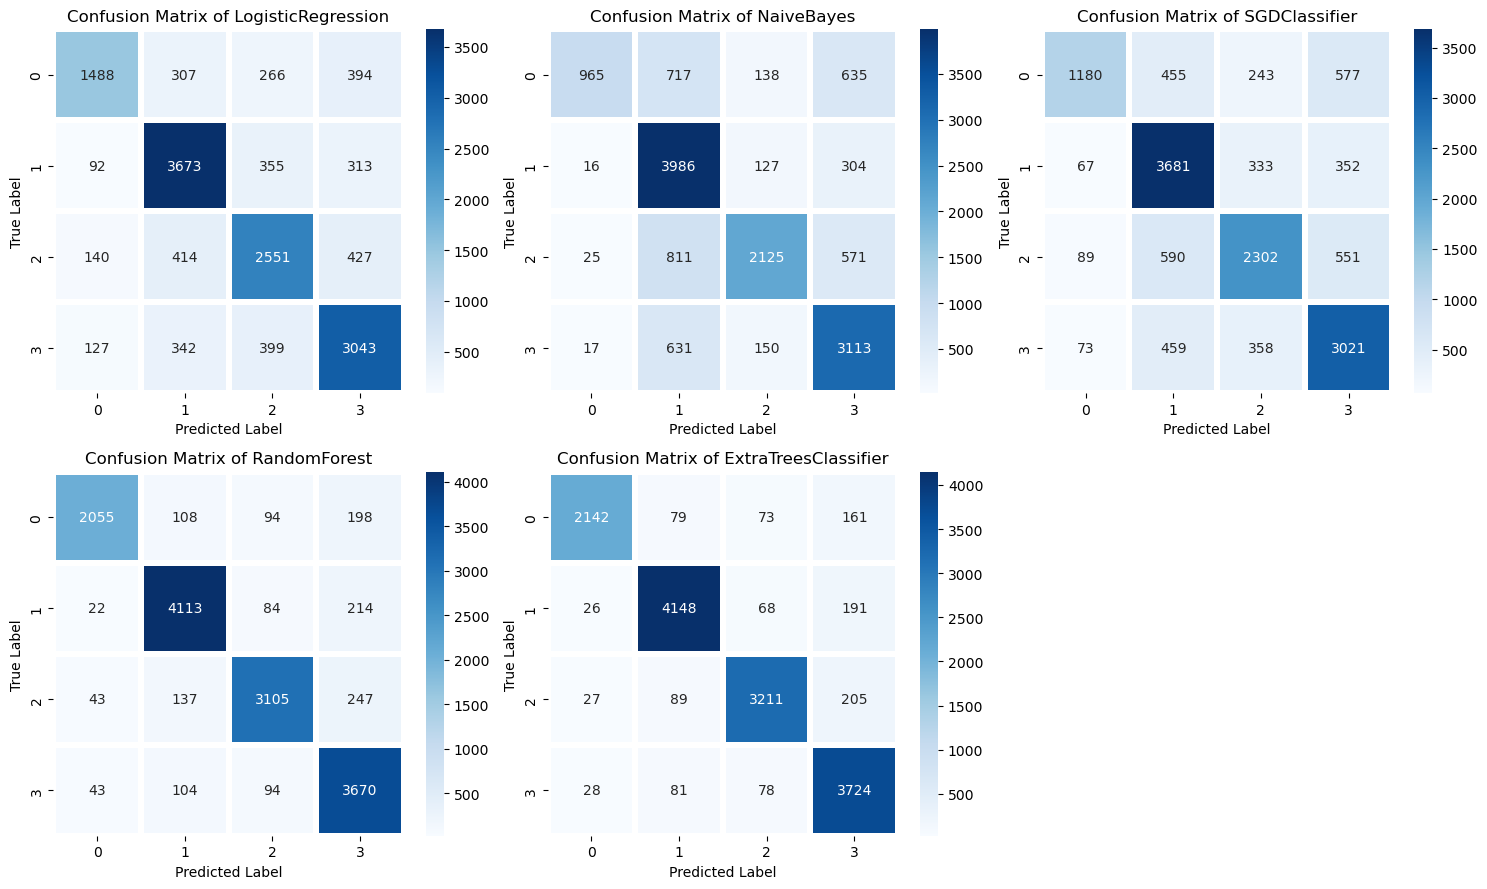

In [81]:
models_predictions = [target_pred_lr, target_pred_nb, target_pred_sgd, target_pred_rf, target_pred_et]
labels = ['LogisticRegression', 'NaiveBayes', 'SGDClassifier', 'RandomForest', 'ExtraTreesClassifier']
plt.figure(figsize=(15, 9))
for n, model_pred in enumerate(models_predictions):
    cm = confusion_matrix(y_test, model_pred)
    plt.subplot(2, 3, n + 1)
    sns.heatmap(cm, annot=True, fmt='d', linewidths=3, cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix of ' + labels[n])
    plt.tight_layout()

### Comparison of Models' Metrics


Comparison of Models' Metrics:
                  Model  Precision  Recall  F1-Score  Accuracy
4  ExtraTreesClassifier     0.9250  0.9228    0.9230    0.9228
3          RandomForest     0.9059  0.9031    0.9031    0.9031
0    LogisticRegression     0.7528  0.7505    0.7487    0.7505
1            NaiveBayes     0.7522  0.7110    0.6998    0.7110
2         SGDClassifier     0.7216  0.7106    0.7051    0.7106


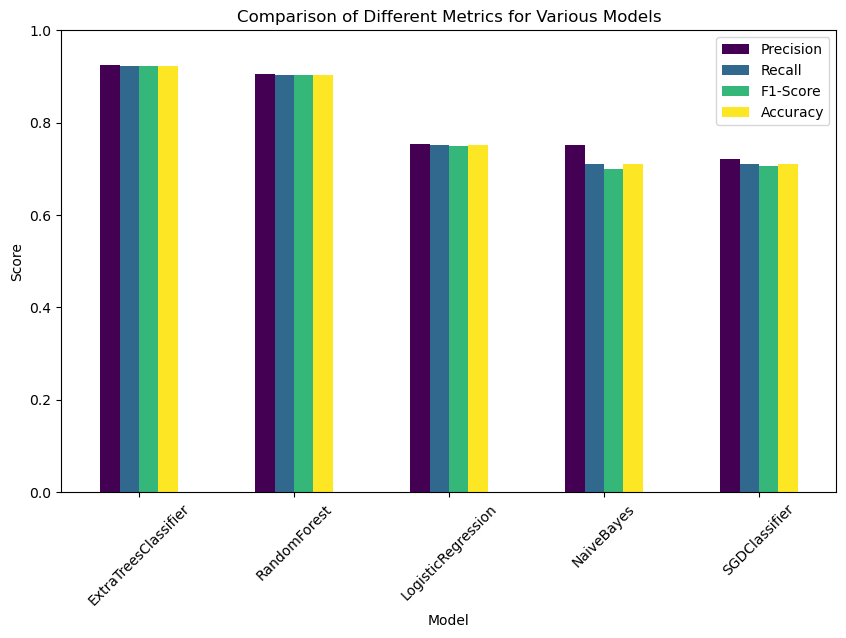

In [83]:
summary_results = []
for model_name, model_pred in zip(labels, models_predictions):
    report = classification_report(y_test, model_pred, output_dict=True)
    precision = round(report['weighted avg']['precision'], 4)
    recall = round(report['weighted avg']['recall'], 4)
    f1_score = round(report['weighted avg']['f1-score'], 4)
    accuracy = round(accuracy_score(y_test, model_pred), 4)
    summary_results.append({
        'Model': model_name,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score,
        'Accuracy': accuracy
    })
metrics_df = pd.DataFrame(summary_results)
metrics_df = metrics_df.sort_values(by='Accuracy', ascending=False)

print("\nComparison of Models' Metrics:")
print(metrics_df)

metrics_df.set_index('Model', inplace=True)
metrics_df.plot(kind='bar', figsize=(10, 6), ylim=(0, 1), colormap='viridis', rot=45)
plt.title('Comparison of Different Metrics for Various Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(['Precision', 'Recall', 'F1-Score', 'Accuracy'])
plt.show()

### True vs. Predicted Label Distributions

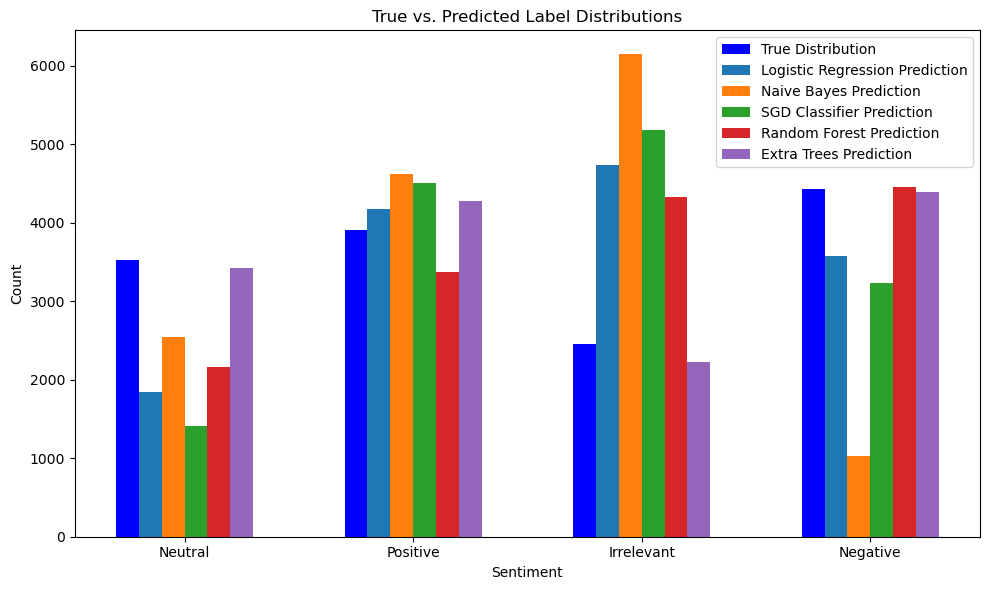

In [85]:
models = {
    "Logistic Regression": logistic_regression,
    "Naive Bayes": naive_bayes,
    "SGD Classifier": sgd_classifier,
    "Random Forest": random_forest,
    "Extra Trees": extra_trees
}
true_distribution = pd.Series(y_test).value_counts(sort=False)
predicted_distributions = {}

# Get predictions and count distributions
for model_name, model in models.items():
    y_pred = model.predict(X_test_tfidf)
    predicted_distributions[model_name] = pd.Series(y_pred).value_counts(sort=False)

plt.figure(figsize=(10, 6))
bar_width = 0.1
classes = true_distribution.index
index = range(len(classes))

plt.bar(index, true_distribution, bar_width, label='True Distribution', color='blue')

for i, (model_name, predicted_dist) in enumerate(predicted_distributions.items()):
    plt.bar([x + bar_width * (i + 1) for x in index], predicted_dist, bar_width, label=f'{model_name} Prediction')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('True vs. Predicted Label Distributions')
plt.xticks([x + bar_width * len(models) / 2 for x in index], classes)
plt.legend()
plt.tight_layout()
plt.show()